In [1]:
# おまじない
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from IPython.display import display
from tensorflow import keras

# 各列の名称
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Names"]

# データの整理
dataset = pd.read_excel("drive/MyDrive/auto-mpg.xlsx", sheet_name=0, names=column_names)    # データの読み込み
dataset = dataset.drop("Car Names", axis=1)     # 車名の列を削除
dataset["Origin"] = dataset["Origin"].map({1: "USA", 2: "Europe", 3: "Japan"})  # 1をUSA、2をEurope、3をJapanに置換
dataset = pd.get_dummies(dataset, columns=["Origin"])   # カテゴリデータを数値データに変換

# display(dataset)    # 表の表示
# display(dataset.describe())  # 統計情報の表示

# データを学習用とテスト用に分離
train_dataset = dataset.sample(frac=0.8, random_state=0)    # 8割を学習用に
test_dataset = dataset.drop(train_dataset.index)            # 残りをテスト用に

# 説明変数と目的変数に分離
train_x = train_dataset.copy()  # train_xにtrain_datasetをコピー
test_x = test_dataset.copy()    # test_xにtest_datasetをコピー

train_y = train_x.pop("MPG")    # train_xからMPGの列を取り出しtrain_yに代入
test_y = test_x.pop("MPG")      # test_xからMPGの列を取り出しtest_yに代入

# np.array形式に変換
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


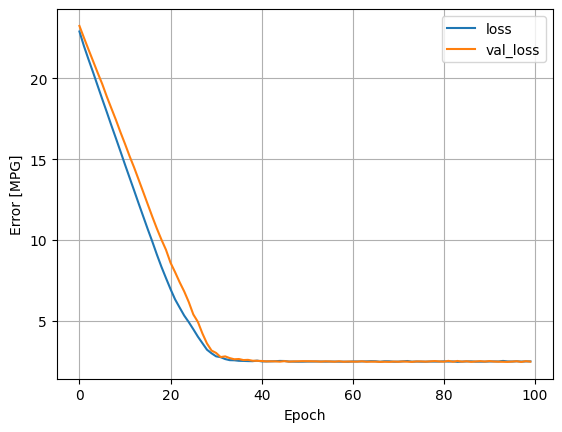

test loss = 2.439136266708374


In [2]:
### 中間層なしの回帰（重回帰） #################################################

# 標準化層のパラメータ計算（平均および分散の計算）
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(train_x)

# モデルの定義
model = keras.Sequential([
    normalizer,             # 標準化層（入力層）
    keras.layers.Dense(1)   # 全結合層（出力層）
])

# 誤差関数および最適化手法の設定
model.compile(
    loss="mean_absolute_error", # 誤差関数をMAEに設定
    optimizer=tf.keras.optimizers.Adam(0.1) # 学習率を0.1に設定
    )
model.summary()     # モデルの構造を表示

# 学習
history = model.fit(
    train_x,    # 燃費以外のデータ（説明変数）
    train_y,    # 燃費（目的変数）
    epochs=100, # 学習回数
    verbose=0,  # 学習進捗表示（1:表示、0:非表示）
    validation_split = 0.2  # 検証データの割合
    )

# 学習結果の表示
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Error [MPG]")
plt.legend()
plt.grid(True)  # グリッド線の表示
plt.show()

# モデルの評価
test_results = model.evaluate(test_x, test_y, verbose=0)
print(f"test loss = {test_results}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


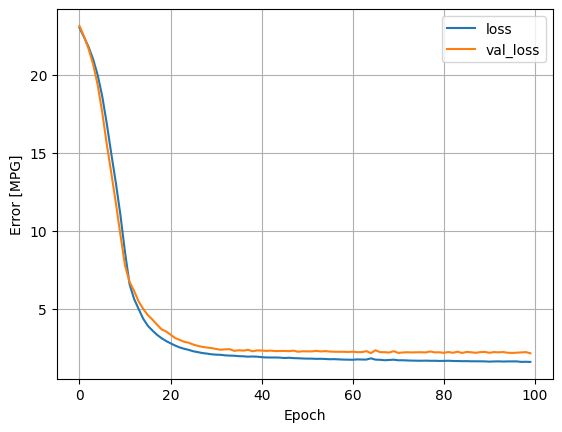

test loss = 1.671588659286499


In [3]:
### DNN回帰 ####################################################################

# 標準化層のパラメータ計算（平均および分散の計算）
normalizer = keras.layers.Normalization(axis=-1)
normalizer.adapt(train_x)

# モデルの定義
model = keras.Sequential([
    normalizer,                                 # 標準化層（入力層）
    keras.layers.Dense(64, activation='relu'),  # 全結合層（ユニット数64）
    keras.layers.Dense(64, activation='relu'),  # 全結合層（ユニット数64）
    keras.layers.Dense(1)                       # 全結合層（出力層）
])

# 誤差関数および最適化手法の設定
model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
    )
model.summary()

# 学習
history = model.fit(
    train_x,    # 燃費以外のデータ（説明変数）
    train_y,    # 燃費（目的変数）
    epochs=100, # 学習回数
    verbose=0,  # 学習進捗表示（1:表示、0:非表示）
    validation_split = 0.2  # 検証データの割合
    )

# 学習結果の表示
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)
plt.show()

# モデルの評価
test_results = model.evaluate(test_x, test_y, verbose=0)
print(f"test loss = {test_results}")